In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn;sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [6]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
np_classes = len(class_names)

print(class_names_label)
IMAGE_SIZE = (150,150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [11]:

def load_data():
  DIRECTORY = '/Users/neharana/Downloads/Intel_Image_Classification_Datasets'
  CATEGORY = ["seg_train", "seg_test"]

  output = []

  for category in CATEGORY :
    path = os.path.join(DIRECTORY, category)
    print(path)
    images = []
    labels = []

    print("Loading {}".format(category))

    for folder in os.listdir(path):
      if folder == ".DS_Store":
        continue
      label = class_names_label[folder]

      #iterate through each image in our folder
      for file in os.listdir(os.path.join(path, folder)) :

        #Get the path name of the image
        img_path = os.path.join(os.path.join(path, folder), file)

        #open and resize the image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        #Append the image and it's corresponding label to the output
        images.append(image)
        labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [12]:
(train_images, train_labels), (test_images, test_labels) = load_data()

/Users/neharana/Downloads/Intel_Image_Classification_Datasets/seg_train
Loading seg_train
/Users/neharana/Downloads/Intel_Image_Classification_Datasets/seg_test
Loading seg_test


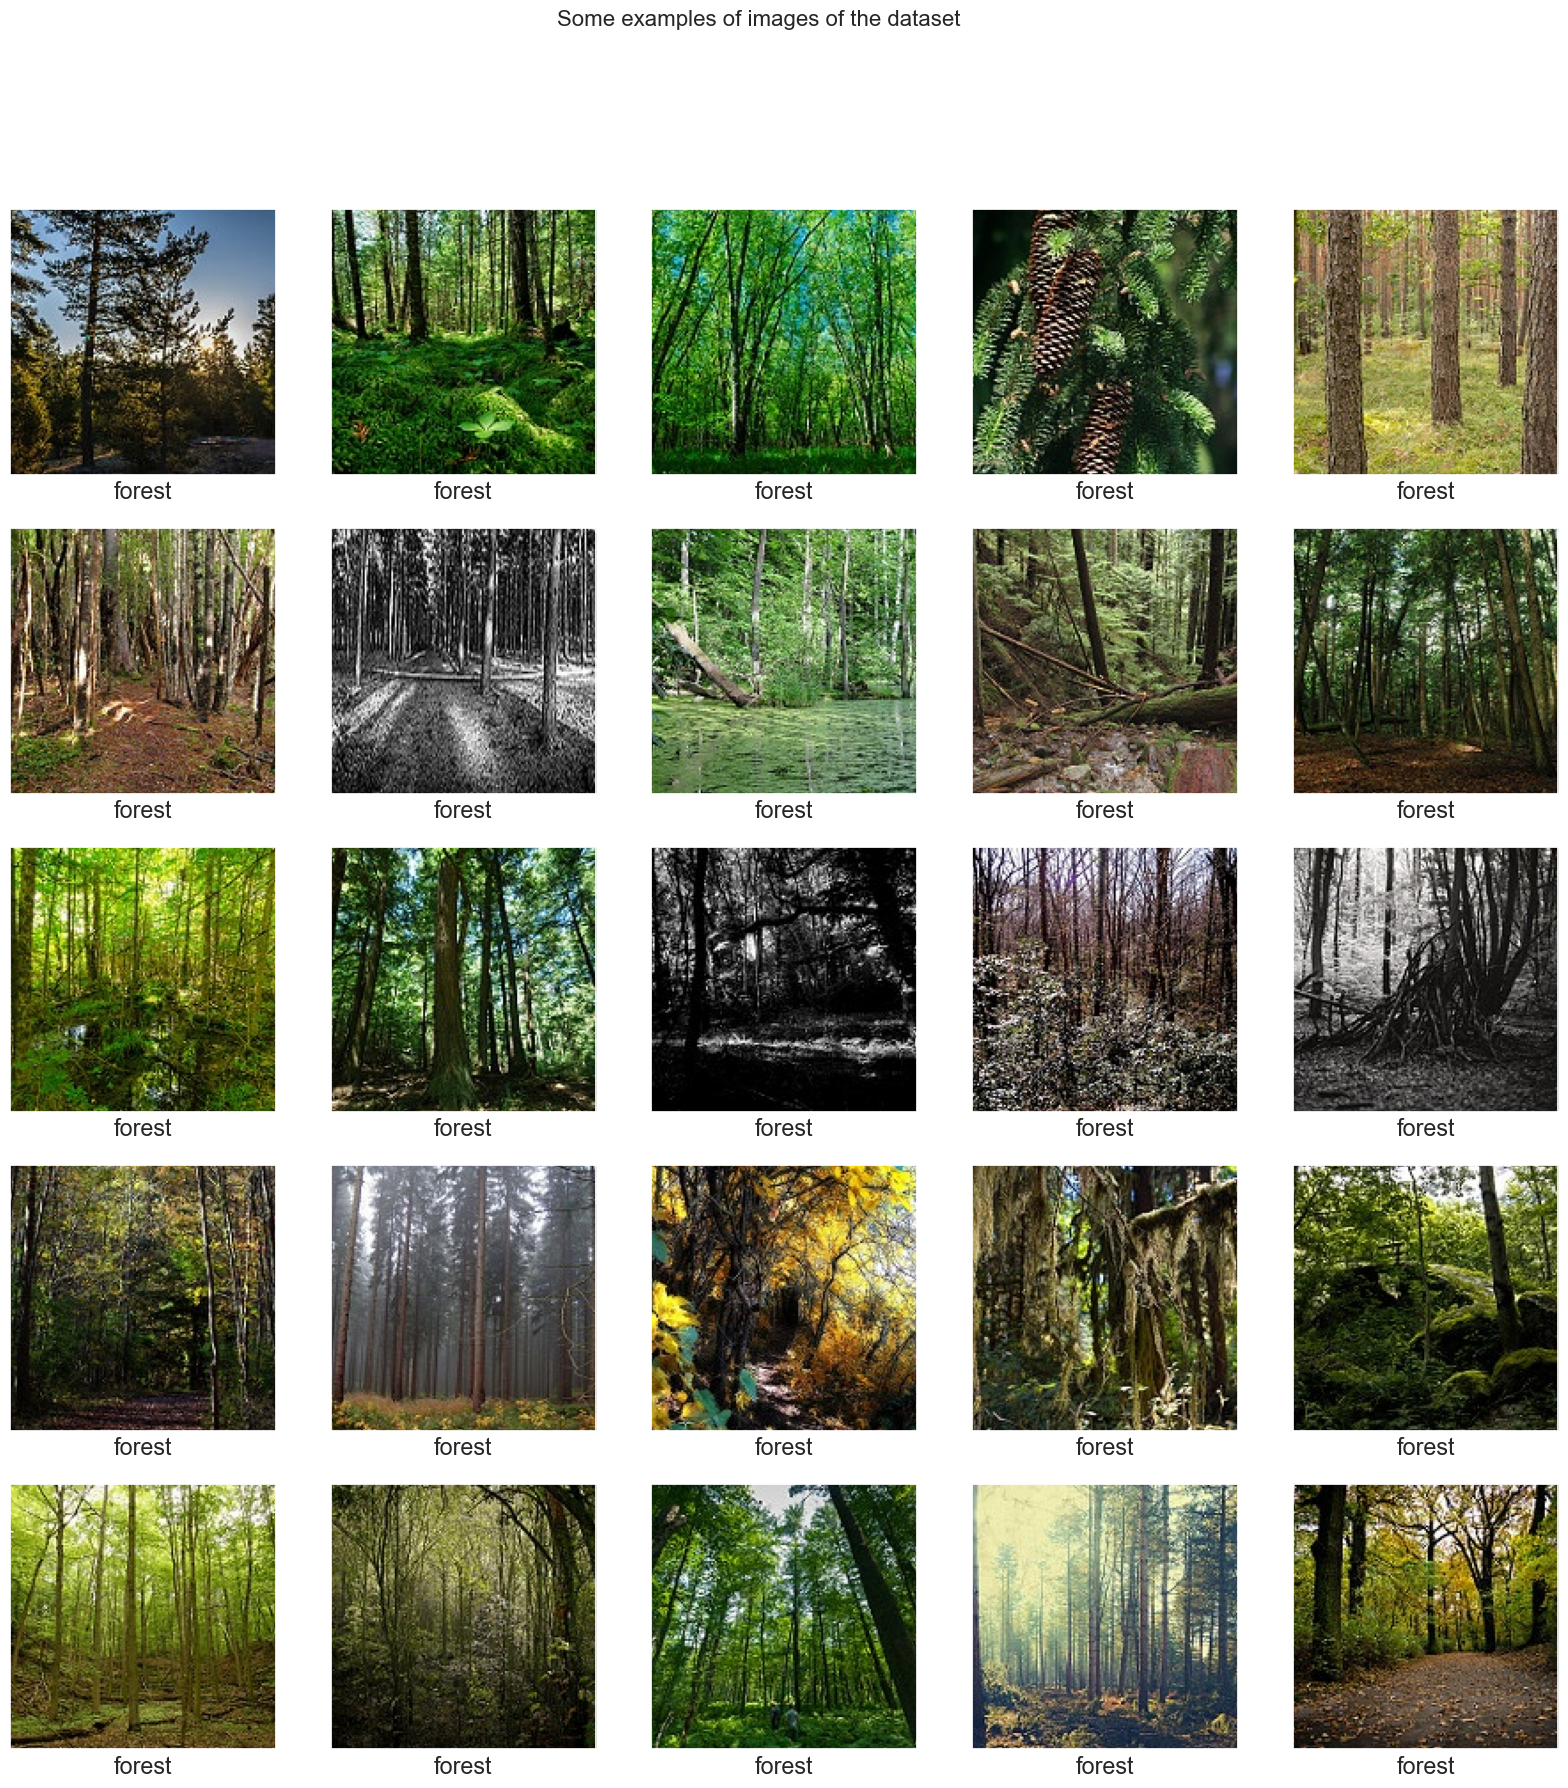

In [13]:
def display_examples(class_names, images, labels):
  """
    Display 25 images from the images array with it's corresponding labels
  """
  figsize = (20,20)
  fig = plt.figure(figsize=figsize)
  fig.suptitle("Some examples of images of the dataset", fontsize=16)
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #image = cv2.resize(images[i], figsize)
    plt.imshow(images[i].astype(np.uint8))
    plt.xlabel(class_names[labels[i]])
  plt.show()

display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=4, validation_split=0.2)

Epoch 1/4
88/88 [==============================] - 49s 553ms/step - loss: 64.8403 - accuracy: 0.4518 - val_loss: 3.8183 - val_accuracy: 0.1058
Epoch 2/4
88/88 [==============================] - 49s 554ms/step - loss: 0.8696 - accuracy: 0.7002 - val_loss: 4.4413 - val_accuracy: 0.1101
Epoch 3/4
88/88 [==============================] - 47s 538ms/step - loss: 0.5151 - accuracy: 0.8195 - val_loss: 5.8214 - val_accuracy: 0.1286
Epoch 4/4
88/88 [==============================] - 47s 538ms/step - loss: 0.3223 - accuracy: 0.8908 - val_loss: 9.5279 - val_accuracy: 0.1108


In [17]:
def plot_accuracy_loss(history):
    """
     Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    #Plot Accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label="acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #Plot Loss Function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label="loss")
    plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.legend()
    plt.show()

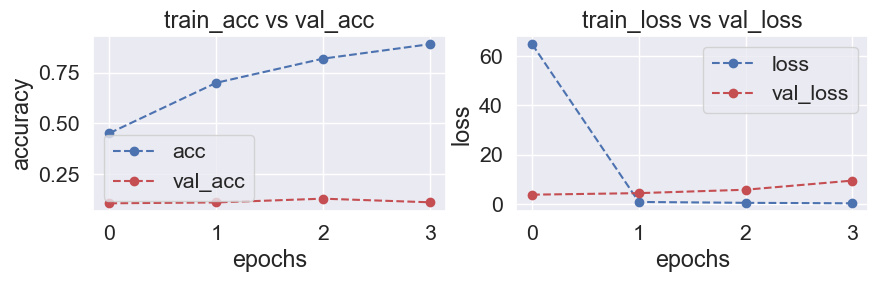

In [19]:
plot_accuracy_loss(history)

In [20]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 3s 35ms/step - loss: 2.9859 - accuracy: 0.5563


In [21]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print(classification_report(test_labels, pred_labels))

94/94 [==============================] - 4s 36ms/step
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       525
           1       0.57      0.61      0.59       501
           2       0.52      0.75      0.62       553
           3       0.45      0.72      0.55       437
           4       0.00      0.00      0.00       510
           5       0.88      0.68      0.77       474

    accuracy                           0.56      3000
   macro avg       0.49      0.56      0.51      3000
weighted avg       0.49      0.56      0.51      3000



/Users/neharana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neharana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neharana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
